In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
df = pd.read_csv("../data/Classified Data.csv", index_col=0)

In [19]:
df.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [24]:
scaler = StandardScaler()
x = df.drop("TARGET CLASS", axis=1)
scaler.fit(x)
# Media + desvio padrao transformados
df_standard = scaler.transform(x)
df_params = pd.DataFrame(df_standard, columns=[df.columns[:-1]])

StandardScaler()

In [30]:
df_params.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    df_standard,
    df['TARGET CLASS'],
    test_size=0.3,
    random_state=42
)

In [66]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [67]:
y_pred = knn.predict(x_test)

In [68]:
print("Classification Report:\n", ("-" * 60), "\n", classification_report(y_test, y_pred))

Classification Report:
 ------------------------------------------------------------ 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [69]:
print("Confusion Matrix\n", ("-" * 15), "\n", confusion_matrix(y_test, y_pred))

Confusion Matrix
 --------------- 
 [[135   7]
 [  8 150]]


In [63]:
# Observando o melhor valor de K
erro_rate = []

for i in range(1, 40):
    model_tuning = KNeighborsClassifier(n_neighbors = i)
    model_tuning.fit(x_train, y_train)
    y_pred = model_tuning.predict(x_test)
    erro_rate.append(np.mean(y_pred != y_test))

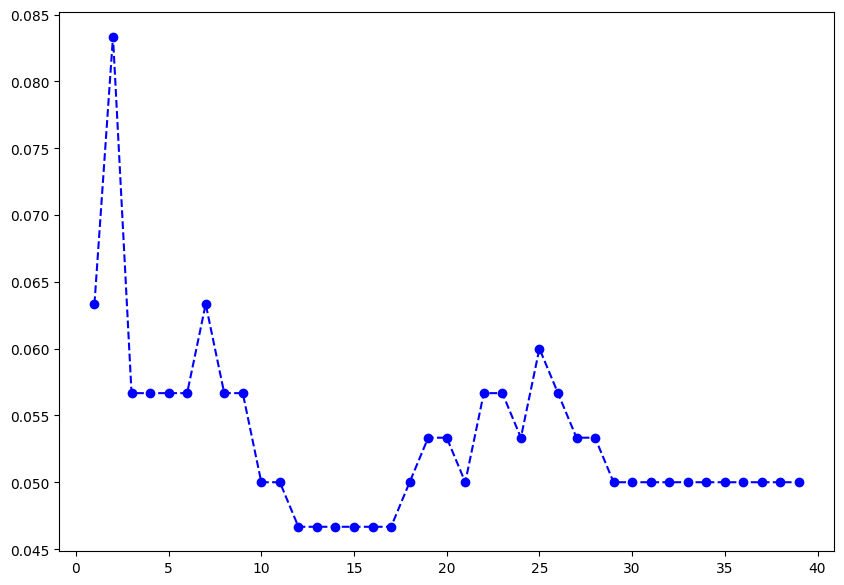

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 40), erro_rate, color='blue', linestyle='dashed', marker='o')